In [86]:
pip install tabulate


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [87]:
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os 
import csv
from tabulate import tabulate

![markdown](https://i.pinimg.com/736x/58/67/5d/58675d159f41fe8f992e859df681df34.jpg)

### FILE DATA .CSV
[BankChurners](https://github.com/thanhthao2004/Churn_prediction/blob/main/BankChurners.csv)

# Meaning of each column in the Data file
----------------------------------------------------------------
1. **CLIENTNUM**: Provides a unique identification number for each customer in the dataset.
----------------------------------------------------------------
2. **Attrition_Flag**: Indicates whether the customer has churned (Attrited Customer) or not (Existing Customer).
----------------------------------------------------------------
3. **Customer_Age**: The age of the customer.
----------------------------------------------------------------
4. **Gender**: The gender of the customer (M = Male, F = Female).
----------------------------------------------------------------
5. **Dependent_count**: Indicates the number of dependents the customer has, such as spouse, children, or parents.
----------------------------------------------------------------
6. **Education_Level**: The education level of the customer (Uneducated, High School, College, Graduate, Post-Graduate).
----------------------------------------------------------------
7. **Marital_Status**: The marital status of the customer (Single, Married, Divorced, Separated, Civil Marriage).
----------------------------------------------------------------
8. **Income_Category**: Represents the income range of the customer (Less than $40K, $40K - $60K, $60K - $80K, $80K - $120K, $120K+).
----------------------------------------------------------------
9. **Card_Category**: The type of credit card the customer has (Blue, Silver, Gold, Platinum).
----------------------------------------------------------------
10. **Months_on_book**: The number of months the customer has been with the bank
----------------------------------------------------------------
11. **Total_Relationship_Count**: The total number of products (services/bank cards) the customer has with the bank.
----------------------------------------------------------------
12. **Months_Inactive_12_mon**: The number of months the customer has been inactive in the past 12 months.
----------------------------------------------------------------
13. **Contacts_Count_12_mon**: The number of times the customer has contacted the bank in the past 12 months.
----------------------------------------------------------------
14. **Credit_Limit**: The credit limit of the customer.
----------------------------------------------------------------
15. **Total_Revolving_Bal**: The total outstanding balance on revolving credit accounts (e.g., credit cards).
----------------------------------------------------------------
16. **Avg_Open_To_Buy**: The average open-to-buy credit line in the past 12 months.
----------------------------------------------------------------
17. **Total_Amt_Chng_Q4_Q1**: The change in the total transaction amount from Q4 to Q1.
----------------------------------------------------------------
18. **Total_Trans_Amt**: The total transaction amount in the past 12 months.
----------------------------------------------------------------
19. **Total_Trans_Ct**: The total number of transactions in the past 12 months.
----------------------------------------------------------------
20. **Total_Ct_Chng_Q4_Q1**: The change in the total transaction count from Q4 to Q1.
----------------------------------------------------------------
21. **Avg_Utilization_Ratio**: The average card utilization ratio of the customer.
----------------------------------------------------------------
22. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1**:Naive Bayes Classifier - a probabilistic classification algorithm based on Bayes' theorem. This column contains the predicted probability that the customer will churn.
----------------------------------------------------------------
23. **Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2**: This column contains the predicted probability that the customer will not churn.
----------------------------------------------------------------


##  Read data .csv

In [88]:
import pandas as pd
# URL of the raw CSV file
url = 'https://raw.githubusercontent.com/thanhthao2004/Churn_prediction/main/BankChurners.csv'  
df = pd.read_csv(url)
print(df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

In [89]:
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',axis=1)
df = df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',axis=1)


In [90]:
print(df)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

## Convert categorical columns to numeric for easier model training.

In [91]:

# Get a list of categorical columns
category_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Các cột category:", category_columns)

# Get a list of numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Các cột numeric:", numeric_columns)

Các cột category: ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Các cột numeric: ['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [92]:
categorical_columns = ['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.astype('category').cat.codes)

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances)

                     feature  importance
16           Total_Trans_Amt    0.199428
17            Total_Trans_Ct    0.161027
18       Total_Ct_Chng_Q4_Q1    0.103820
13       Total_Revolving_Bal    0.090967
19     Avg_Utilization_Ratio    0.067318
9   Total_Relationship_Count    0.066218
15      Total_Amt_Chng_Q4_Q1    0.058300
1               Customer_Age    0.033601
12              Credit_Limit    0.032742
14           Avg_Open_To_Buy    0.029342
11     Contacts_Count_12_mon    0.027245
0                  CLIENTNUM    0.026565
8             Months_on_book    0.024887
10    Months_Inactive_12_mon    0.023656
2                     Gender    0.012004
3            Dependent_count    0.011974
4            Education_Level    0.010621
6            Income_Category    0.010293
5             Marital_Status    0.007959
7              Card_Category    0.002035


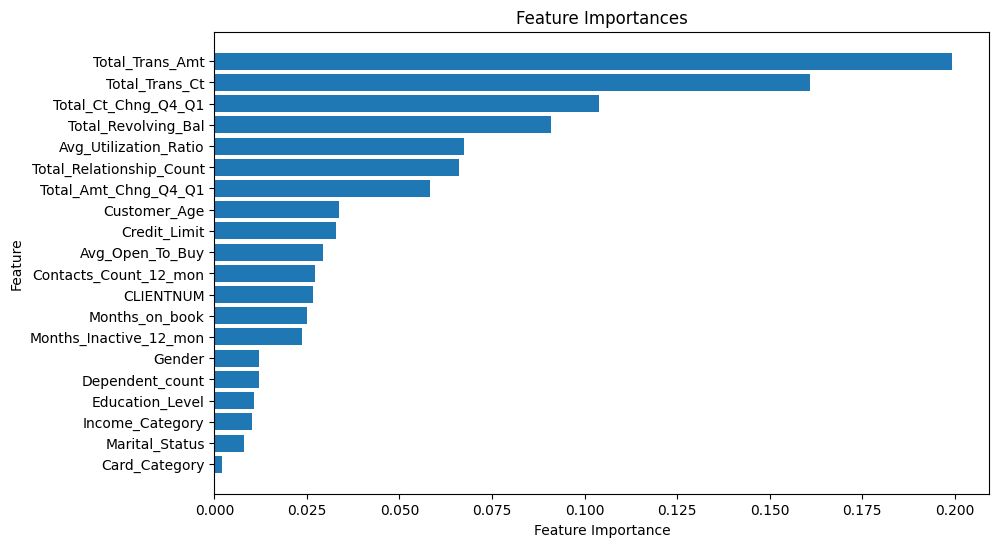

In [94]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

## **I. Data Preprocessing**

### 1. Missing Values

In [95]:
import pandas as pd
# Test for missing values
missing_values = df.isnull().sum()
print(missing_values)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


### *=======> No missing values*

![markdown](https://i.pinimg.com/originals/fd/21/40/fd21405af1235d129f7ff6806d8c51a9.jpg)

### 2. Outliers

* Use the z-score to detect outliers.
* The z-score measures how far a data point is from the mean in terms of standard deviations.
* Values with a z-score greater than a certain threshold (e.g., 3) are considered outliers.
* Z-score > 3 or Z-score < -3: Typically considered outliers in many situations. This is equivalent to the value being outside the range of ±3 standard deviations from the mean.

Z-score là một đại lượng thống kê cho biết một giá trị cụ thể nằm cách bao xa so với giá trị trung bình, tính bằng số lần độ lệch chuẩn.

Z = (x - μ) / σ
* x is the observed value
* μ (mu) is the mean of the distribution
* σ (sigma) is the standard deviation of the distribution

In [96]:
from scipy import stats
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number]))) 
threshold = 3
outliers = np.where(z_scores > threshold)
print("Outliers:")
print(df.iloc[outliers[0]])

Outliers:
       CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0      768805383               1            45       1                3   
1      818770008               1            49       0                5   
1      818770008               1            49       0                5   
2      713982108               1            51       1                3   
2      713982108               1            51       1                3   
...          ...             ...           ...     ...              ...   
10117  712503408               1            57       1                2   
10120  710841183               1            54       1                1   
10121  713899383               1            56       0                1   
10122  772366833               1            50       1                2   
10126  714337233               0            43       0                2   

       Education_Level  Marital_Status  Income_Category  Card_Category  \
0              

In [97]:
# Remove rows with outliers
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# Save the processed DataFrame
df_cleaned.to_csv("BankChurners_cleaned.csv", index=False)

IF YOU WANT TO RESTORE THE REMOVED DATAFRAME, USE THE FOLLOWING CODE:
*df_restored = df_original.copy()*

### 3. Handling duplicate data

In [98]:
df.drop_duplicates(inplace=True)

### 4. Standardize


***Identify columns that need to be normalized, typically continuous or interval-scaled numerical columns, because:***

* Value Distribution: Continuous numerical columns often have a wide range of values and can have different distributions (e.g., normal, skewed). Normalization brings these values to the same scale, making it easier for machine learning algorithms to work effectively.

* Distance Between Values: Many machine learning algorithms, such as linear regression, k-means clustering, and SVM, use the distance between data points to make predictions. If columns have different scales, those with larger value ranges will dominate the results, reducing the model's accuracy. Normalization ensures each feature contributes fairly to the overall distance calculation.

* Gradient Optimization: In gradient-based optimization algorithms (e.g., neural networks, logistic regression), normalizing the data helps gradient descent converge faster because the gradients become more stable.

* Model Interpretation: When input values are on the same scale, it becomes easier to interpret the weights and their magnitudes in the model.

* Improved Model Performance: Normalization often improves the performance of machine learning algorithms by reducing bias and enhancing the model's learning ability.

## **II. Exploratory Data Analysis - EDA:**

### **1. Descriptive statistics play a crucial role in analyzing and gaining a deeper understanding of a dataset.**

### Therefore, for the numerical data columns, I will calculate the Mean, Median, Standard Deviation, Minimum, and Maximum values.

### For the categorical data columns, I will calculate the frequency, percentage, and mode.

* #### Customer_Age column  

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate statistics
mean_value = df['Customer_Age'].mean()
median_value = df['Customer_Age'].median()
std_value = df['Customer_Age'].std()
min_value = df['Customer_Age'].min()
max_value = df['Customer_Age'].max()

# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})

print(stats_df)

            Statistic      Value
0                Mean  46.325960
1              Median  46.000000
2  Standard Deviation   8.016814
3                 Min  26.000000
4                 Max  73.000000


* #### Dependent_count column

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
# Calculate statistics
mean_value = df['Dependent_count'].mean()
median_value = df['Dependent_count'].median()
std_value = df['Dependent_count'].std()
min_value = df['Dependent_count'].min()
max_value = df['Dependent_count'].max()
# Create a DataFrame to store the statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

            Statistic     Value
0                Mean  2.346203
1              Median  2.000000
2  Standard Deviation  1.298908
3                 Min  0.000000
4                 Max  5.000000


* #### Income_Category column

In [101]:
import pandas as pd
# Calculate frequency and percentage
frequency_table = df['Income_Category'].value_counts()
percentage_table = df['Income_Category'].value_counts(normalize=True) * 100

print("Frequency table:")
print(frequency_table)
print("\nPercentage table:")
print(percentage_table)

# Find mode
mode_value = df['Income_Category'].mode()[0]
print(f"\nMost frequent income group: {mode_value}")

Frequency table:
Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64

Percentage table:
Income_Category
4    35.163425
1    17.675521
3    15.157500
2    13.844179
5    10.980547
0     7.178829
Name: proportion, dtype: float64

Most frequent income group: 4


* #### Months_on_book column 

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Months_on_book'].mean()
median_value = df['Months_on_book'].median()
std_value = df['Months_on_book'].std()
min_value = df['Months_on_book'].min()
max_value = df['Months_on_book'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics      Value
0             Average  35.928409
1              Median  36.000000
2  Standard Deviation   7.986416
3                 Min  13.000000
4                 Max  56.000000


* #### Total_Relationship_Count column

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Total_Relationship_Count'].mean()
median_value = df['Total_Relationship_Count'].median()
std_value = df['Total_Relationship_Count'].std()
min_value = df['Total_Relationship_Count'].min()
max_value = df['Total_Relationship_Count'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics     Value
0             Average  3.812580
1              Median  4.000000
2  Standard Deviation  1.554408
3                 Min  1.000000
4                 Max  6.000000


* #### Months_Inactive_12_mon column

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Months_Inactive_12_mon'].mean()
median_value = df['Months_Inactive_12_mon'].median()
std_value = df['Months_Inactive_12_mon'].std()
min_value = df['Months_Inactive_12_mon'].min()
max_value = df['Months_Inactive_12_mon'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics     Value
0             Average  2.341167
1              Median  2.000000
2  Standard Deviation  1.010622
3                 Min  0.000000
4                 Max  6.000000


* #### Total_Revolving_Bal column

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Total_Revolving_Bal'].mean()
median_value = df['Total_Revolving_Bal'].median()
std_value = df['Total_Revolving_Bal'].std()
min_value = df['Total_Revolving_Bal'].min()
max_value = df['Total_Revolving_Bal'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics        Value
0             Average  1162.814061
1              Median  1276.000000
2  Standard Deviation   814.987335
3                 Min     0.000000
4                 Max  2517.000000


* #### Total_Ct_Chng_Q4_Q1 column

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Total_Ct_Chng_Q4_Q1'].mean()
median_value = df['Total_Ct_Chng_Q4_Q1'].median()
std_value = df['Total_Ct_Chng_Q4_Q1'].std()
min_value = df['Total_Ct_Chng_Q4_Q1'].min()
max_value = df['Total_Ct_Chng_Q4_Q1'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics     Value
0             Average  0.712222
1              Median  0.702000
2  Standard Deviation  0.238086
3                 Min  0.000000
4                 Max  3.714000


* #### Total_Trans_Ct column

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Total_Trans_Ct'].mean()
median_value = df['Total_Trans_Ct'].median()
std_value = df['Total_Trans_Ct'].std()
min_value = df['Total_Trans_Ct'].min()
max_value = df['Total_Trans_Ct'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics       Value
0             Average   64.858695
1              Median   67.000000
2  Standard Deviation   23.472570
3                 Min   10.000000
4                 Max  139.000000


* #### Total_Trans_Amt column

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Total_Trans_Amt'].mean()
median_value = df['Total_Trans_Amt'].median()
std_value = df['Total_Trans_Amt'].std()
min_value = df['Total_Trans_Amt'].min()
max_value = df['Total_Trans_Amt'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics         Value
0             Average   4404.086304
1              Median   3899.000000
2  Standard Deviation   3397.129254
3                 Min    510.000000
4                 Max  18484.000000


* #### Credit_Limit column

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
#Calculate statistical values
mean_value = df['Credit_Limit'].mean()
median_value = df['Credit_Limit'].median()
std_value = df['Credit_Limit'].std()
min_value = df['Credit_Limit'].min()
max_value = df['Credit_Limit'].max()
#Create a Dataframe containing statistical values
stats_df = pd.DataFrame({
    'Statistics': ['Average', 'Median', 'Standard Deviation', 'Min', 'Max'],
    'Value': [mean_value, median_value, std_value, min_value, max_value]
})
print(stats_df)

           Statistics         Value
0             Average   8631.953698
1              Median   4549.000000
2  Standard Deviation   9088.776650
3                 Min   1438.300000
4                 Max  34516.000000


### **2. Data distribution analysis:**
### I will plot histograms to better understand the distribution of columns of numeric data
### and use boxplot charts to detect outliers and compare the distribution of columns of data.

* #### Histogram and Boxplot of Customer_Age column 
##### *Draw histograms and boxplots to better understand the distribution and dispersion of customer ages. This can help detect customer age groups and differences in their behavior.*

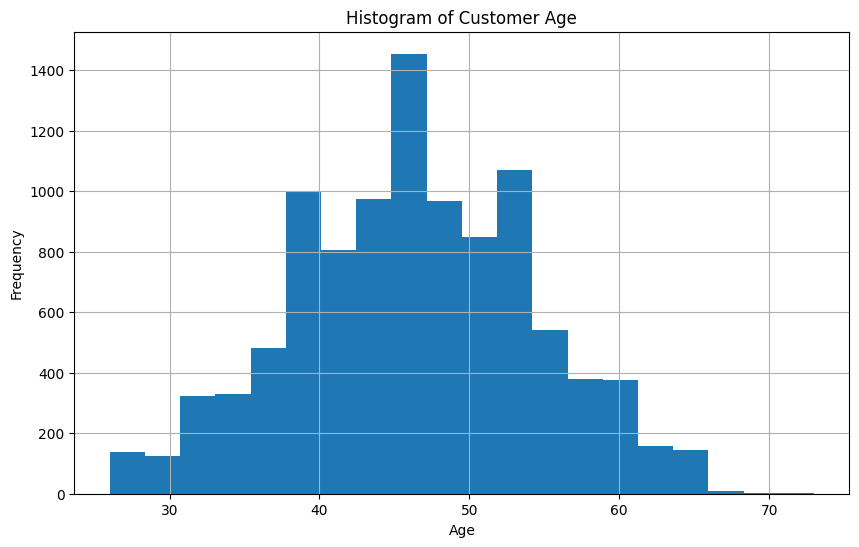

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
df['Customer_Age'].hist(bins=20)
plt.title('Histogram of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

***Comment***  
The customer age histogram shows a roughly bell-shaped distribution with a slight skew to the right.

**1. Main features:**
* Center: The most concentrated age of customers is between 45-50 years old.
* Dispersion: Customer age ranges from about 25 to 70 years old.
* Skewness: There is a slight right skew, meaning there are more older customers than younger customers.

**2. Age groups:**
* Young customers (under 30 years old): Small quantity.
* Middle-aged customers (30-50 years old): Make up the majority.
* Older customers (over 50 years old): Number decreases with age.  
===> General comments:  
Overall, the chart shows that the bank has a large number of middle-aged and older customers.   
This can be useful for tailoring products and services to each customer age group.   
For example, banks can offer retirement savings products for older customers or home loan packages for middle-aged customers.

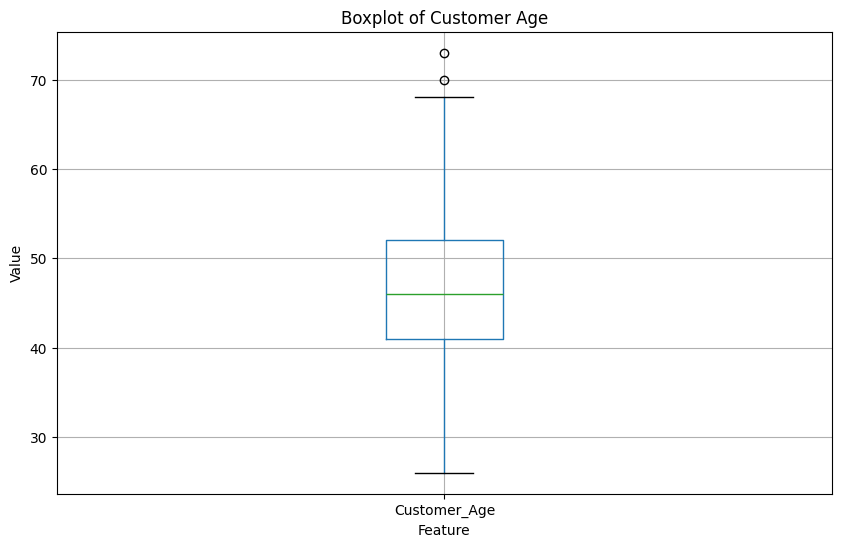

In [111]:
# Draw a boxplot chart
plt.figure(figsize=(10, 6))
df.boxplot(column=['Customer_Age'])
plt.title('Boxplot of Customer Age')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

***Comment***  
A customer age boxplot shows the age distribution of customers 

**1. Main features:**
* Median: The median age of customers is about 46 years old. This means that 50% of customers are under the age of 46 and 50% of customers are over the age of 46.
*Quartiles:  
First quartile (Q1): About 43 years old, meaning 25% of customers are under 43 years old.  
Third quartile (Q3): Around 50 years old, meaning 75% of customers are under 50 years old.
* Interquartile range (IQR): IQR = Q3 - Q1 = 7 years, IQR = 7 indicates that the age of the most "average" 50% of customers is within a wide range of 7 years. This means that the ages of these customers are not too dispersed.
* Outliers: There are some exceptional customers over the age of 68.
* Distribution: Customer age distribution is quite balanced, without too much deviation in any direction.

**2. Age groups:**
* Young customers (under 30 years old): Small quantity.
* Middle-aged customers (30-50 years old): Make up the majority.
* Older customers (over 50 years old): Number decreases with age.  
===> General comments:  
The majority of the bank's customers are middle-aged (from 43 to 50 years old).  
There are a few older customers (over 68 years old), but not significant.  
No customer is too young (under 26 years old).

* ### Histogram và Boxplot of Total_Revolving_Bal và Avg_Utilization_Ratio column

#### Plot histograms and boxplots to better understand the distribution of revolving balances and utilization rates. This information can help analyze customers' financial behavior.

* #### Total_Revolving_Bal column 

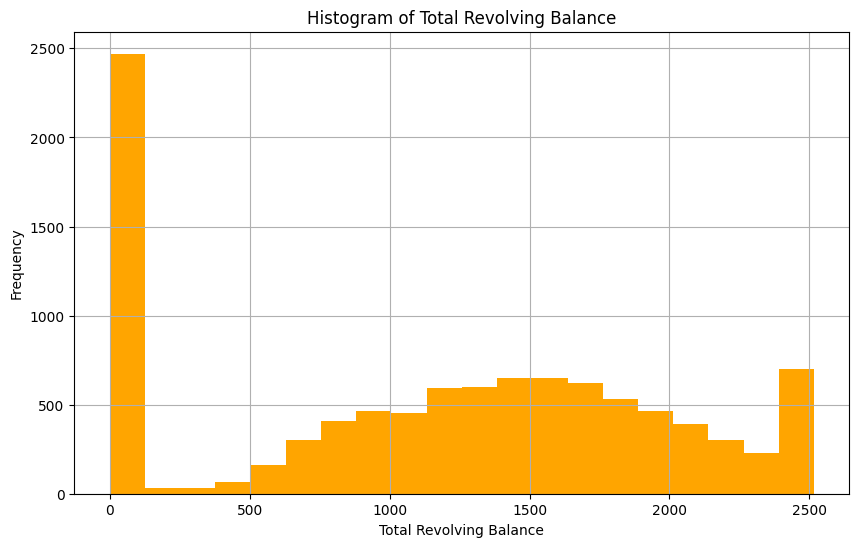

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Draw a histogram
plt.figure(figsize=(10, 6))
df['Total_Revolving_Bal'].hist(bins=20, color='orange')
plt.title('Histogram of Total Revolving Balance')
plt.xlabel('Total Revolving Balance')
plt.ylabel('Frequency')
plt.show()

***Comment***  
The histogram shows the distribution of the customer's "Total Revolving Balance".   
Based on the chart, we can comment:

**Main features:**
* Strong right-skewed distribution: Most customers have low revolving debt balances (concentrated around 0-500).   
However, there are a small number of customers with very high outstanding balances (about 2500).
First quartile (Q1): About 43 years old, meaning 25% of customers are under 43 years old.  
Third quartile (Q3): Around 50 years old, meaning 75% of customers are under 50 years old.
* Two peaks: There are two peaks in the chart, one at around 0 and one at around 2500.   
This shows that there are two distinct groups of customers: one group that hardly uses their credit limit and one group that uses almost all of their credit limit.  
* Few customers have average balances: Very few customers have average revolving balances (about 1000-2000).

***===> General comments:***  
Most customers tend not to use or use very little of their credit limit.  
A small portion of customers tend to use almost all of their credit limit.  
Further analysis may be needed to understand why there is a clear division between these two customer groups.

**Based on the chart, we can see**
* Banks can use this information to adjust marketing and risk management strategies.  
For example, banks can focus on encouraging customers who do not use credit to use more, while closely monitoring customers with high debt balances to minimize credit risk.
* This chart can also help banks better understand customers' credit usage behavior, thereby developing products and services more suitable to the needs of each customer group.

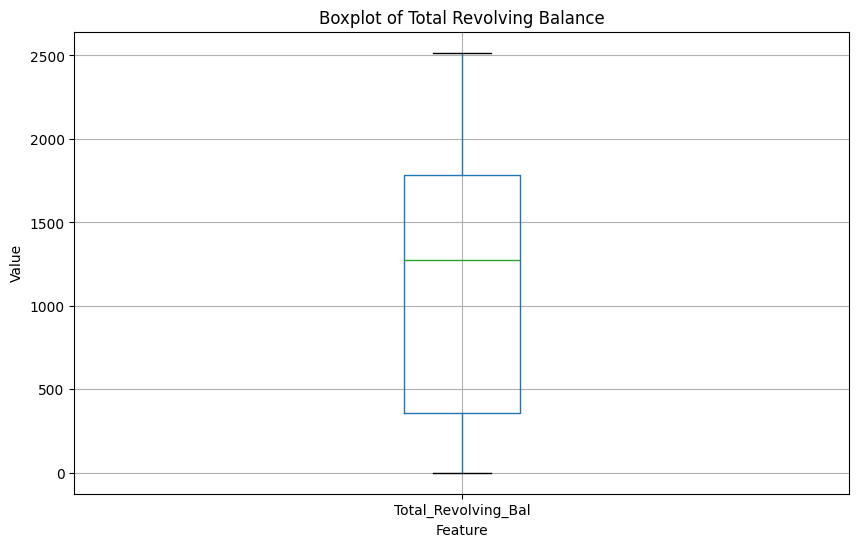

In [113]:
# Draw a boxplot chart
plt.figure(figsize=(10, 6))
df.boxplot(column=['Total_Revolving_Bal'])
plt.title('Boxplot of Total Revolving Balance')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

***Comment***  
The boxplot chart shows the distribution of "Total Revolving Balance". Based on the chart, we can comment:

**Main features:**
* Median: About 1200. This means that 50% of customers have a revolving credit balance below 1200 and 50% have a debt balance above 1200.
*Quartiles:  
Q1 (25th percentile): About 400. 25% of customers have a revolving balance of less than 400.  
Q3 (75th percentile): About 1800. 75% of customers have revolving debt balances below 1800.  
* Interquartile range (IQR): IQR = Q3 - Q1 = 1400. This value range contains 50% of the customer's revolving debt balance.  
* Outliers: There are a small number of customers with revolving balances above 2,500.

===> General comments:  
Most customers have revolving debt balances concentrated in the range of 400 to 1800.  
There are a few customers with very high revolving credit balances (over 2500).  
No customer has a negative revolving credit balance.

* #### Avg_Utilization_Ratio column

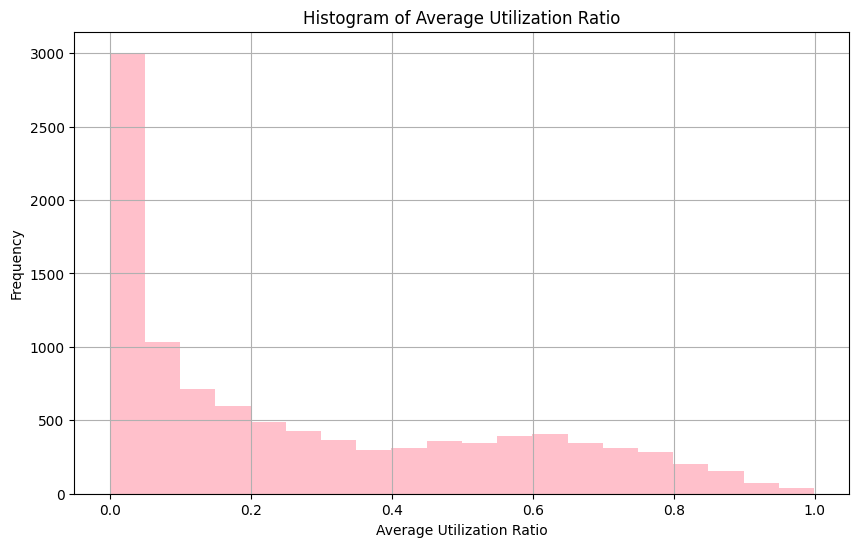

In [114]:
# Draw a histogram
plt.figure(figsize=(10, 6))
df['Avg_Utilization_Ratio'].hist(bins=20, color='pink')
plt.title('Histogram of Average Utilization Ratio')
plt.xlabel('Average Utilization Ratio')
plt.ylabel('Frequency')
plt.show()

***Comment***  
The histogram shows the distribution of the customer's "Average Utilization Ratio". Based on the chart, we can comment:

**Main features:**
* Strong right-skewed distribution: Most customers have a very low average usage rate (concentrated around 0-0.1).   
However, there are a small number of customers with higher usage rates (about 0.8-1.0).
* Peak at low values: The graph has its highest peak at values ​​near 0, indicating that the majority of customers use very little of their credit limit.  

===> General comments:  
Most customers tend not to use or use very little of their credit limit.  
Only a very small portion of customers use most of their credit limit.

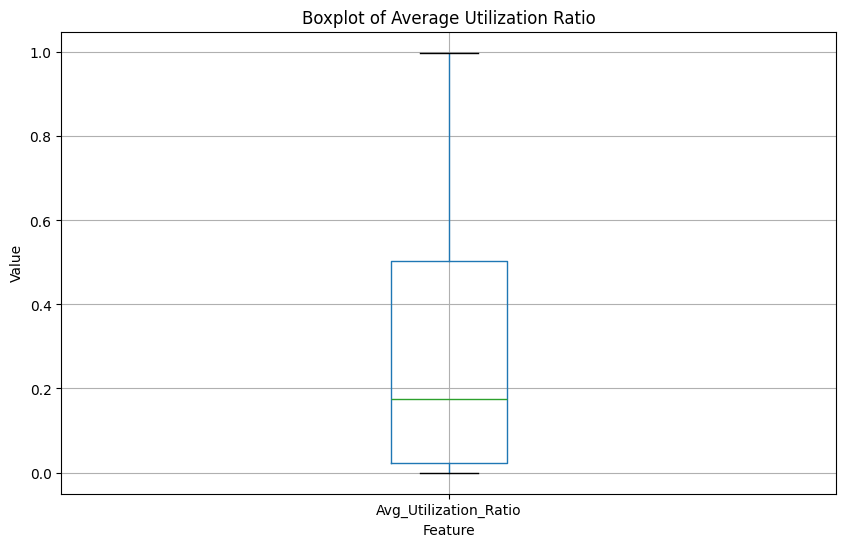

In [115]:
# Draw a boxplot chart
plt.figure(figsize=(10, 6))
df.boxplot(column=['Avg_Utilization_Ratio'])
plt.title('Boxplot of Average Utilization Ratio')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

***Comment***  
The boxplot chart shows the distribution of "Average Utilization Ratio". Based on the chart, we can comment:

**Main features:**
* Median: About 0.2. This means that 50% of customers have an average utilization rate below 0.2 and 50% have an average utilization rate above 0.2.
*Quartiles:
Q1 (25th percentile): About 0.0. 25% of customers have an average usage rate of 0.  
Q3 (75th percentile): About 0.5. 75% of customers have an average usage rate below 0.5.  
* Interquartile range (IQR): IQR = Q3 - Q1 = 0.5. This range contains 50% of the average customer usage rate.
* Outliers: There are a small number of customers with an average usage rate of 1.0.

===> General comments:  
The majority of customers have an average usage rate centered around 0 to 0.5.  
There are a small number of customers with very high average usage rates (above 1.0).  
25% of customers do not use credit (average utilization rate is 0).

* ### Histogram and Boxplot of Total_Trans_Amt and Total_Trans_Ct columns:
##### *Draw histogram and boxplot to better understand the distribution of total transaction amount and number of transactions. This information can help analyze the level of customer trading activity.*

* #### Total_Trans_Amt column

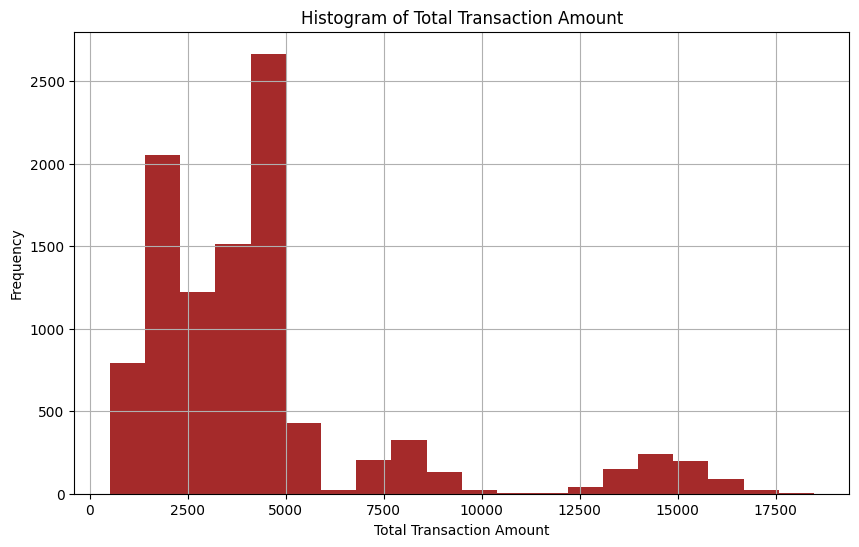

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Draw a histogram for Total_Trans_Amt
plt.figure(figsize=(10, 6))
df['Total_Trans_Amt'].hist(bins=20, color = 'brown')
plt.title('Histogram of Total Transaction Amount')
plt.xlabel('Total Transaction Amount')
plt.ylabel('Frequency')
plt.show()

***Comment***  
The histogram shows the distribution of customers' "Total Transaction Amount". Based on the chart, we can comment:

**Main features:**
* Right-skewed distribution: Most customers have a low total transaction value (under 5000).  
However, there are a few customers with very high total transaction value (over 15,000).
* Peak at low value: The chart has the highest peak at around 2500, indicating that the majority of customers have a total transaction value at this level.
* Decreases with transaction value: Frequency decreases as transaction value increases, meaning fewer customers have high total transaction value.
* There is a gap: There is a gap between 10000 and 12500, indicating that very few customers have a total transaction value in this range.

===> General comments:  
Most customers have low to medium total transaction value.  
A small portion of customers have a very high total transaction value.  
Further analysis may be needed to understand why there is a clear division between these two customer groups.

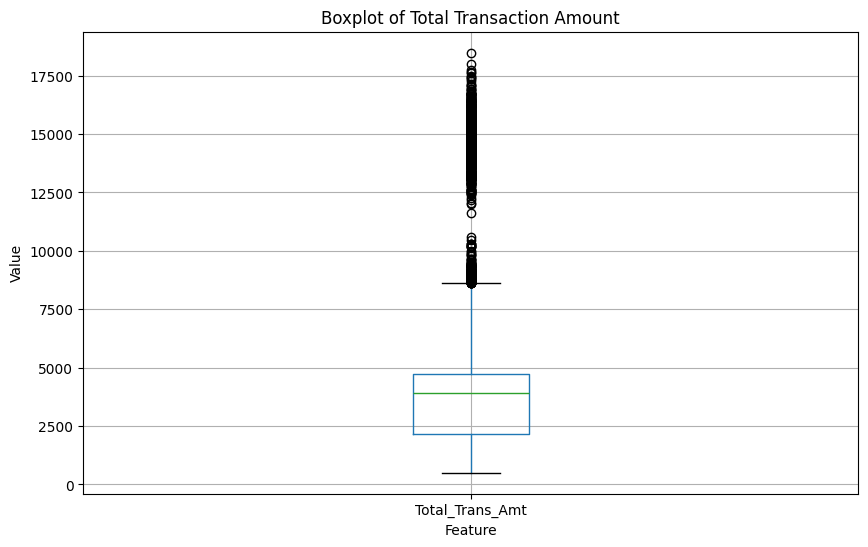

In [117]:
# Draw a boxplot for Total_Trans_Amt
plt.figure(figsize=(10, 6))
df.boxplot(column=['Total_Trans_Amt'])
plt.title('Boxplot of Total Transaction Amount')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

***Comment***    
The boxplot chart shows the distribution of "Total Transaction Amount". Based on the chart, we can comment:  

**Main features:**
* Median: Nearly 4000. This means that 50% of customers have a total transaction value below 4000 and 50% have a total transaction value above 4000.
*Quartiles:  
Q1 (25th percentile): About 2500. 25% of customers have a total transaction value of less than 2500.  
Q3 (75th percentile): About 5000. 75% of customers have a total transaction value of less than 5000.  
* Interquartile range (IQR): IQR = Q3 - Q1 = 2500. This range contains 50% of the total customer transaction value.
* Outliers: There are a significant number of customers with a total transaction value of over 10,000.

===> General comments: 
The majority of customers have a total transaction value concentrated in the range of 2500 to 5000.  
There are a significant number of customers with very high total transaction value (over 10000).

* #### Total_Trans_Ct column

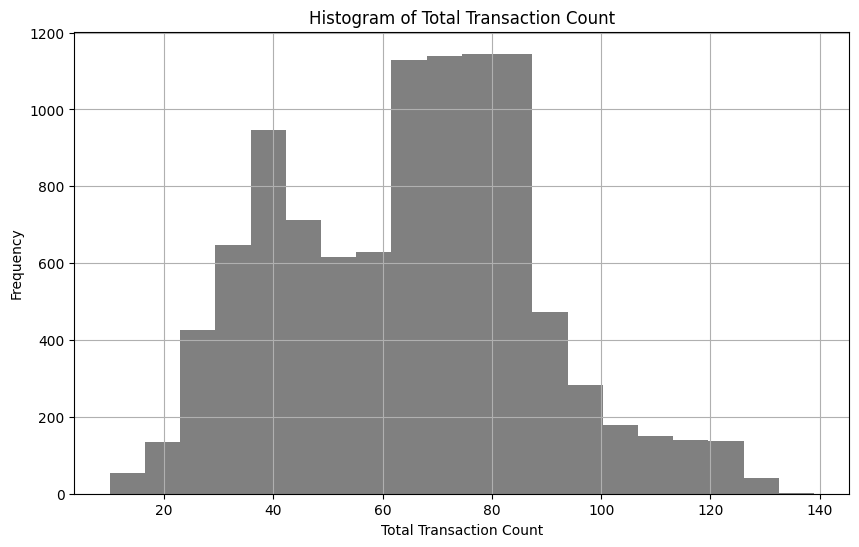

In [118]:
# Draw a histogram for Total_Trans_Ct
plt.figure(figsize=(10, 6))
df['Total_Trans_Ct'].hist(bins=20, color='gray')
plt.title('Histogram of Total Transaction Count')
plt.xlabel('Total Transaction Count')
plt.ylabel('Frequency')
plt.show()

***Comment***    
The histogram shows the distribution of the customer's "Total Transaction Count". Based on the chart, we can comment:

**Main features:**  
* Distribution is roughly bell-shaped: Most customers have an average number of transactions (about 60-80 transactions).   
The number of customers gradually decreases as the number of transactions increases or decreases.
* Peak at around 70 transactions: The chart has its highest peak at around 70 transactions, indicating that this is the most popular number of transactions among customers.
* Moderate dispersion: The number of customer transactions ranges from about 10 to 140 transactions.

===> General comments: 
Most customers have an average number of transactions.  
A small number of customers have very low (under 20) or very high (over 120) transaction volumes.  
There are no major gaps in the distribution, suggesting no clear division between customer groups based on transaction volume.

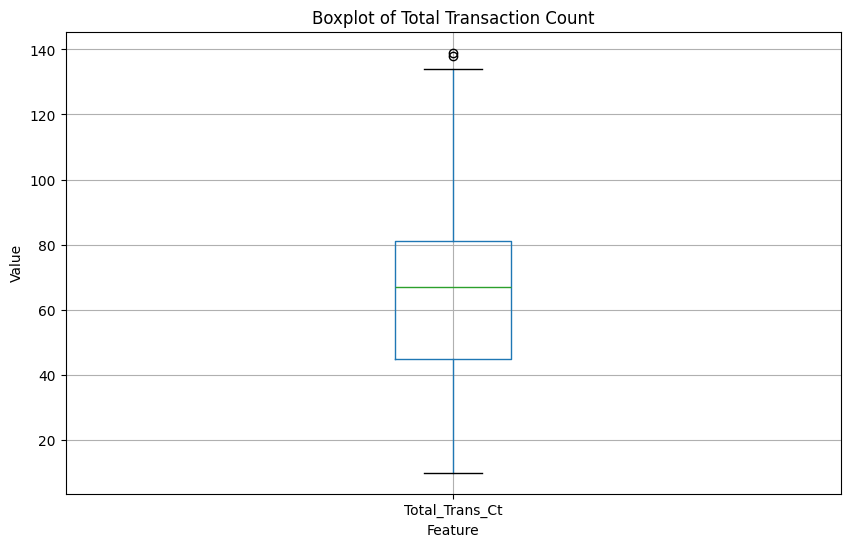

In [119]:
# Draw a boxplot for Total_Trans_Ct
plt.figure(figsize=(10, 6))
df.boxplot(column=['Total_Trans_Ct'])
plt.title('Boxplot of Total Transaction Count')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()

***Comment***  
The boxplot chart shows the distribution of "Total Transaction Count". Based on the chart, we can comment:

**Main features:**  
* Median: Nearly 75 transactions, represented by the green line inside the box. This means that 50% of customers made less than 70 transactions and 50% made more than 70 transactions during the period surveyed.
*Quartiles:  
Q1 (25th percentile): About 45 transactions. 25% of customers make less than 45 transactions.  
Q3 (75th percentile): About 80 transactions. 75% of customers make less than 80 transactions.  
* Outliers: There is at least one outlier indicated by the circle above the upper whisker, around 140 transactions. This means that there are some unusually high transaction values ​​in the data.

===> General comments: 
Most customers make a concentrated number of transactions in the range of 45 to 80 transactions.  
There are a few customers who make a very high number of transactions (over 130 transactions).  
There are no customers who make extremely low numbers of transactions (less than 10 transactions).

* ### Boxplot of Credit_Limit column:
##### *Draw a boxplot to detect outliers and compare the distribution of credit limits. This can help better understand customers' different credit limits.*

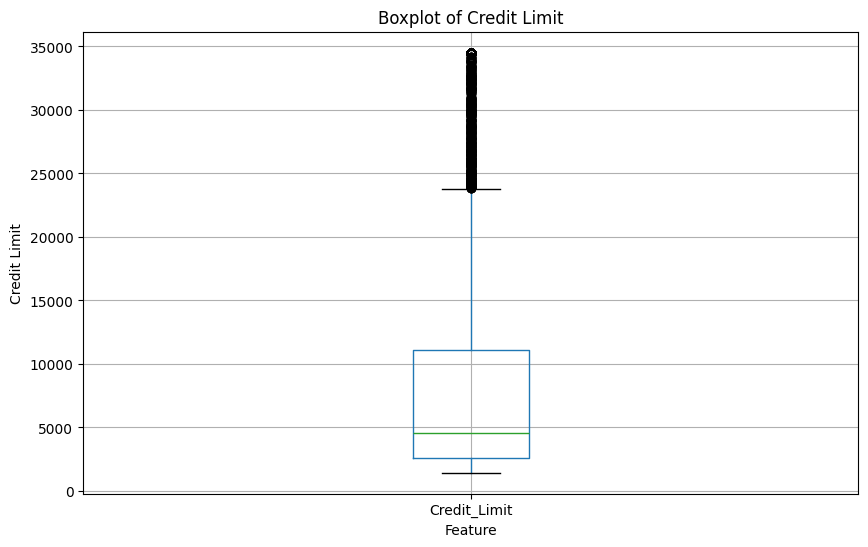

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Draw a boxplot for Credit_Limit
plt.figure(figsize=(10, 6))
df.boxplot(column=['Credit_Limit'])
plt.title('Boxplot of Credit Limit')
plt.xlabel('Feature')
plt.ylabel('Credit Limit')
plt.show()

***Comment***
1. The distribution of credit limits is quite dispersed, with some outlier scores at the very high end.
2. The median of the credit limit is around 10,000, indicating that the average value of the credit limit is 10,000.
3. The interquartile range (IQR) is quite wide, from about 5,000 to 12,000, indicating large dispersion in customer credit limits.
4. There are some outlier points above with very high values, up to about 35,000. This shows that there are some customers whose credit limits are far above the average.

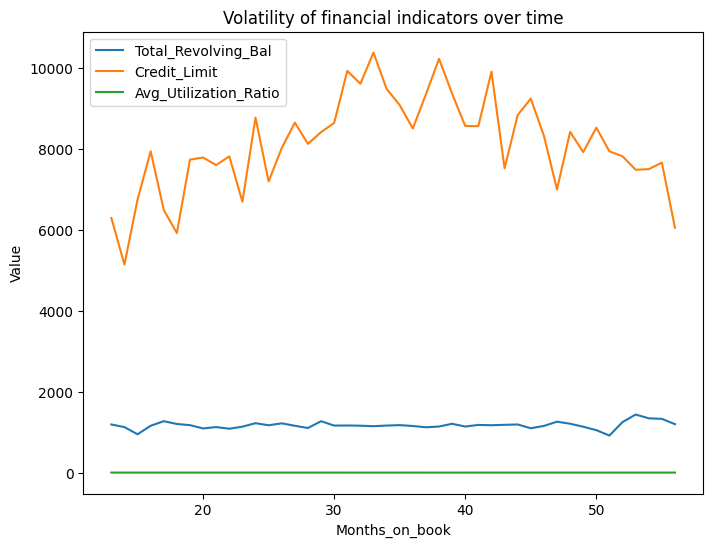

In [121]:
# Graph the fluctuations of financial indicators over time
fig, ax = plt.subplots(figsize=(8, 6))
df.groupby('Months_on_book')[['Total_Revolving_Bal', 'Credit_Limit', 'Avg_Utilization_Ratio']].mean().plot(kind='line', ax=ax)
ax.set_title('Volatility of financial indicators over time')
ax.set_xlabel('Months_on_book')
ax.set_ylabel('Value')
ax.legend()
plt.show()

***Comment***  
This chart shows the fluctuations of financial indicators over time, specifically by the number of months on the books (Months_on_book).

**Main features:**  
* Total_Revolving_Bal (Total revolving balance):    
This index is quite stable over a period of 10 to 60 months, fluctuating slightly around 1500.
* Credit_Limit (Credit limit):
Credit limits fluctuate widely over a period of 10 to 60 months, ranging from 5000 to 11000.  
There are significant increases and decreases over time, indicating that the credit limit is unstable.  
* Avg_Utilization_Ratio (Average utilization rate):
This index remained almost unchanged and remained at a very low level, almost zero, showing that the average credit utilization ratio did not fluctuate significantly over the period.

===> General comments:  
The indicators of outstanding debt and credit card usage rate are stable, credit limit fluctuates abnormally, proving that customers who have been using for a long time from 30-50 months have a higher limit than other customers. from 0-20 months

### **2. Relationship analysis:**

#### *Draw a scatter plot to explore the relationship between pairs of numeric data columns.*
#### *Calculate the correlation coefficient to evaluate the degree of correlation between pairs of numeric data columns.*

* #### Drawing a scatter plot of Total_Revolving_Bal and Total_Trans_Amt helps us understand the relationship between credit card balance and total transaction amount.

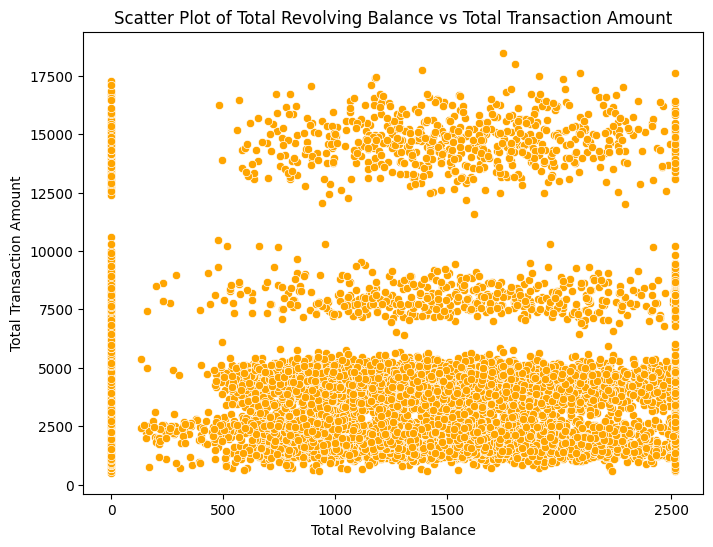

In [122]:
# Draw a scatter plot chart
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Total_Revolving_Bal", y="Total_Trans_Amt", data=df, color="orange")
plt.xlabel("Total Revolving Balance")
plt.ylabel("Total Transaction Amount")
plt.title("Scatter Plot of Total Revolving Balance vs Total Transaction Amount")
plt.show()

***Comment***  
The scatter plot chart shows the relationship between "Total Revolving Balance" (total revolving balance) and "Total Transaction Amount" (total transaction value).

**Main features:**  
* No obvious correlation: The data points are randomly scattered and do not show a clear trend between the two variables.  
This shows that there is no strong linear relationship between total revolving credit balance and total transaction value.
* Concentrated distribution: Data points are mainly concentrated in areas with low total revolving loan balances (under 500) and total transaction value from 2500 to 17500.  
* Some exceptions: There are a small number of data points that fall outside the cluster, indicating that some customers have high revolving credit balances or very low total transaction values.

===> General comments:  
The chart shows that there is no strong connection between customers having high revolving credit balances and the total value of their transactions.
There may be other factors that affect the total transaction value, such as income, spending habits, and credit card type.

***To calculate the correlation coefficient between two variables X and Y, we can use the following formula:***
$$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{ n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}$$
In there:
* $r$ is the correlation coefficient
* $x_i$ and $y_i$ are the values ​​of variables X and Y in the $i$th observation
* $\bar{x}$ and $\bar{y}$ are the average values ​​of variables X and Y
* $n$ is the number of observations

In [123]:
# Calculate the correlation coefficient between Total_Revolving_Bal and Total_Trans_Amt
correlation = df['Total_Revolving_Bal'].corr(df['Total_Trans_Amt'])

print(f"The correlation coefficient between Total_Revolving_Bal and Total_Trans_Amt is: {correlation:.4f}")

The correlation coefficient between Total_Revolving_Bal and Total_Trans_Amt is: 0.0644


*Comment*
1. Average positive correlation (0.2527):
* This shows that as the regular balance (Total_Revolving_Bal) increases, there will usually also be an increase in the total transaction amount (Total_Trans_Amt) and vice versa. 
* However, this relationship is not tight.
2. The correlation value is not too high:
* The correlation coefficient of 0.2527 is only average, not a strong correlation. This means that "Total_Revolving_Bal" is not the only factor that affects "Total_Trans_Amt", or vice versa.
* There are many other factors that can also impact these two variables, such as spending habits, income, number of credit cards, etc.

* #### Vẽ biểu đồ scatter plot Credit_Limit và Avg_Utilization_Ratio
#### Biểu đồ này có thể cung cấp thông tin về mối quan hệ giữa hạn mức tín dụng và tỷ lệ sử dụng thẻ.

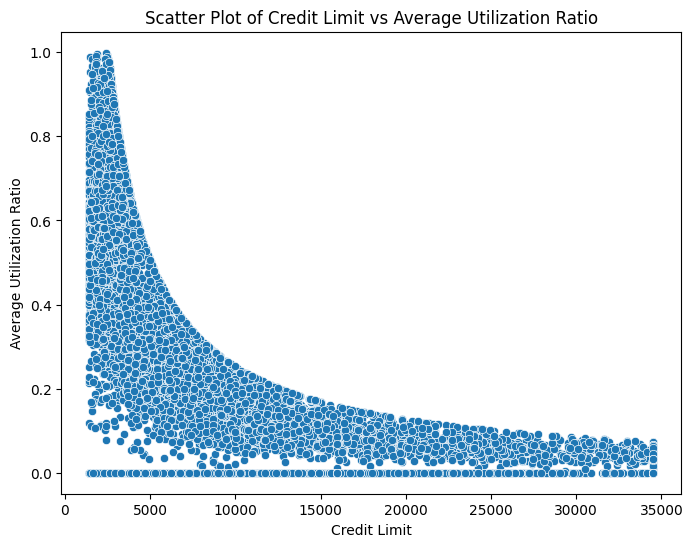

In [124]:
# Draw scatter plot Credit_Limit and Avg_Utilization_Ratio
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Credit_Limit", y="Avg_Utilization_Ratio", data=df)
plt.xlabel("Credit Limit")
plt.ylabel("Average Utilization Ratio")
plt.title("Scatter Plot of Credit Limit vs Average Utilization Ratio")
plt.savefig('scatter_plot_credit_limit_vs_avg_utilization_ratio.png')
plt.show()

***Comment***  
The scatter plot shows the relationship between "Credit Limit" and "Average Utilization Ratio".

**Main features:**  
* Strong negative correlation: Data points clearly show a decreasing trend as credit limits increase.   
This shows that there is a strong negative correlation between the two variables, meaning that as credit limits increase, average utilization rates tend to decrease.
* Uneven distribution: Data points are heavily concentrated in areas with low credit limits and high average utilization rates.  
As the credit limit increases, the density of data points decreases and becomes more dispersed.  
* Many customers have low utilization rates: The majority of customers have an average utilization rate below 0.2, regardless of their credit limit.

===> General comments:  
The relationship between credit limit and average utilization rate is negative and quite strong. This means that customers with high credit limits tend to use less than their limit.  
There are a small number of customers who have very high average utilization rates, even when they have large credit limits.

In [125]:
# Calculate the correlation coefficient between Credit_Limit and Avg_Utilization_Ratio
correlation = df['Credit_Limit'].corr(df['Avg_Utilization_Ratio'])
print(f"The correlation coefficient between Credit_Limit and Avg_Utilization_Ratio is: {correlation:.4f}")

The correlation coefficient between Credit_Limit and Avg_Utilization_Ratio is: -0.4830


*Comment*
1. Strong, inverse correlation:
- Negative correlation coefficient -0.4830 indicates that as "Credit_Limit" increases, "Avg_Utilization_Ratio" will decrease, and vice versa.
- This level of correlation is considered quite strong, because the coefficient value ranges from -0.5 to -0.7.
2. Logical relationship:
* This result is reasonable and consistent with economic logic. When a user has a higher credit limit (Credit_Limit), the lower the limit usage ratio (Avg_Utilization_Ratio) will be, and vice versa.